## INFS3081 Predictive Analytics

### Practical Activity 5.1: DT for classification

### 1 Practical Activity 5.1

#### 1.1 Classification Using Decision Tree
This notebook is an exercise for devloping a decision tree classifier for wine quality prediction. Decision trees can be divided, with respect to the target values, into the following two categories:
- Classification trees used for classification problems. In scikit-learn it is DecisionTreeClassifier.
- Regression trees used for regression. In scikit-learn it is DecisionTreeRegressor.

We walk through DecisionTreeClassifier in this practical activity.

#### 1.2 The wine quality dataset
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

This dataset is available in sklearn library and we will use it from there.

#### 1.3 Dataset preparation


In [1]:
from sklearn.datasets import load_wine
data = load_wine()

In [2]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


We notice that the dataset is sorted by the target class. It is always a good idea to use feed random data to the model. Therefore, we shuffle the dataset.

In [4]:
df = df.sample(frac=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,1
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1


### 2 Task: Wine quality prediction
In this practical activity, we develop a decision tree classifier for wine quality prediction. The quality is given as {0,1,2}. To build the model, we will use the decision tree implementation of sklearn library.

#### 2.1 Decision Tree using sklearn
Documentation can be found at: 👉 [scikit-learn: DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

To construct the tree, we need to create a decision tree object and apply the fit method to the training set.

In [5]:
features = list(df.columns)
features.remove('target')

In [6]:
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
# splitting the dataset
from sklearn.model_selection import train_test_split

# stratified sampling
X_train, X_test, y_train, y_test = train_test_split(df[features], df['target'], test_size=0.25, stratify=df['target'], random_state=42)

In [9]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
# evaluation
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, dt.predict(X_test))

print(f"Accuracy: {acc:.2f}")

Accuracy: 0.98


The model has 98% accuracy on the test set. Let, us now visualize the model.

#### 2.2 Decision tree visualization
Decision trees are mostly popular for their interpretability. We can visually represent decision trees. There are four ways to visualise a Decision Tree in Python:
- print text representation of the tree with sklearn.tree.export_text method.
- plot with sklearn.tree.plot_tree method (matplotlib needed).
- plot with sklearn.tree.export_graphviz method (graphviz needed).
- plot with dtreeviz package (dtreeviz and graphviz needed).

We will cover the first two here as they are simpler to use than graphviz and dtreeviz based visualization. 

More information at: 👉 [Visualize a Decision Tree](https://mljar.com/blog/visualize-decision-tree/)

#### 2.3 Text Representation
The textual representation of decision trees provides a means to understand how the model is predicting the target. We can analyse the model to see if the model is reliable or not. 

More information at: 👉 [scikit-learn: export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text)

In [12]:
from matplotlib import pyplot as plt
from sklearn import tree

In [13]:
text_representation = tree.export_text(dt, feature_names=features)
print(text_representation)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- malic_acid <= 1.60
|   |   |   |--- hue <= 0.77
|   |   |   |   |--- class: 2
|   |   |   |--- hue >  0.77
|   |   |   |   |--- class: 1
|   |   |--- malic_acid >  1.60
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- proline <= 726.50
|   |   |   |   |--- class: 1
|   |   |   |--- proline >  726.50
|   |   |   |   |--- total_phenols <= 2.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- total_phenols >  2.35
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- malic_acid <= 1.82
|   |   |   |--- class: 1
|   |   |--- malic_acid >  1.82
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50

We can extract rules like:

*if proline <= 755.00 and od280/od315 of diluted wines <= 2.11 and malic acid <= 1.60 and hue <= 0.77 then class: 2*

to understand the model.

#### 2.4 Graphical Representation
Alternatively we can plot the model as a tree structure using the plot_tree method. The plot_tree method requires matplotlib to be installed.

More information at: 👉 [scikit-learn: plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

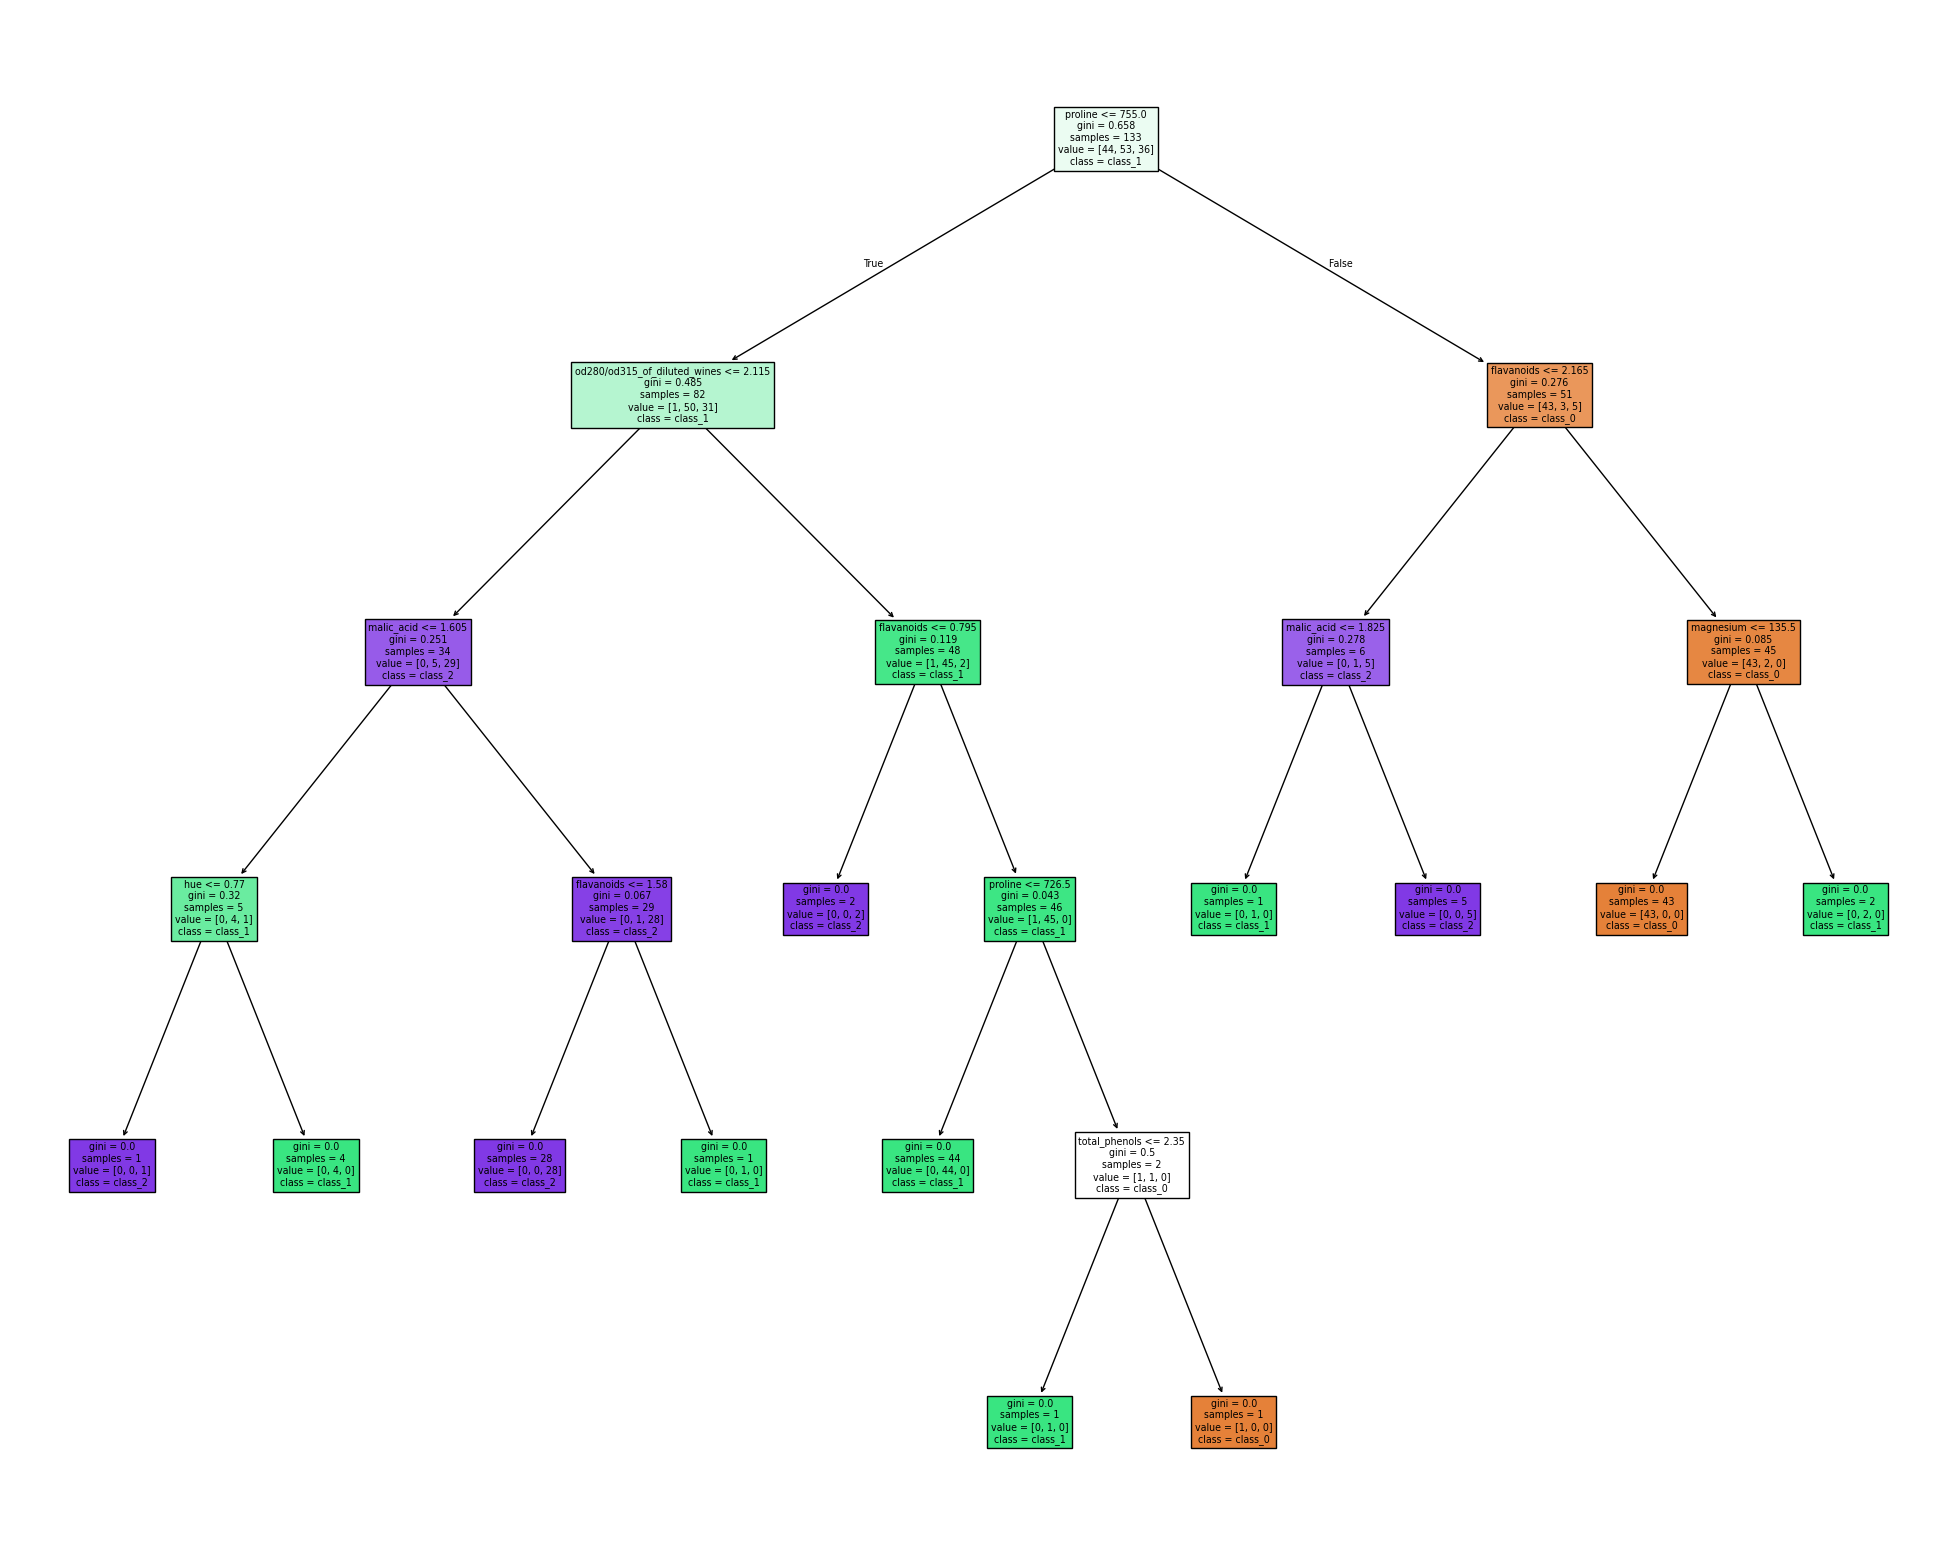

In [14]:
tree_fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names=data.target_names,
                   filled=True)

We observe that both text and tree representations are hard to read. In the above, we have grown the tree fully. When we have a complex relationship among the explanatory variables and target, the trees can be difficult to interpret. Therefore, we prune the trees which also helps to generalise well.

#### 2.5 Effects of impurity measures
As we have seen in the concept videos, there are multiple impurity measures to choose from in decision tree construction. In sklearn there are two impurity measures - gini and entropy. We can specify the measure we want to use by using Decision Tree object creation. By default, sklearn uses gini i.e., the decision tree we saw above is constructed using gini. Below, we will use entropy and compare both the trees.

In [15]:
# criterion {gini, entropy}, default="gini"

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy.fit(X_train, y_train)
acc_entropy = accuracy_score(y_test, dt_entropy.predict(X_test))
print(f"Accuracy with entropy: {acc_entropy:.2f}")

Accuracy with entropy: 0.96


In [16]:
text_representation = tree.export_text(dt_entropy, feature_names=features)
print(text_representation)

|--- flavanoids <= 1.58
|   |--- color_intensity <= 3.82
|   |   |--- class: 1
|   |--- color_intensity >  3.82
|   |   |--- alcalinity_of_ash <= 17.65
|   |   |   |--- class: 1
|   |   |--- alcalinity_of_ash >  17.65
|   |   |   |--- class: 2
|--- flavanoids >  1.58
|   |--- proline <= 722.50
|   |   |--- class: 1
|   |--- proline >  722.50
|   |   |--- color_intensity <= 3.46
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.46
|   |   |   |--- class: 0



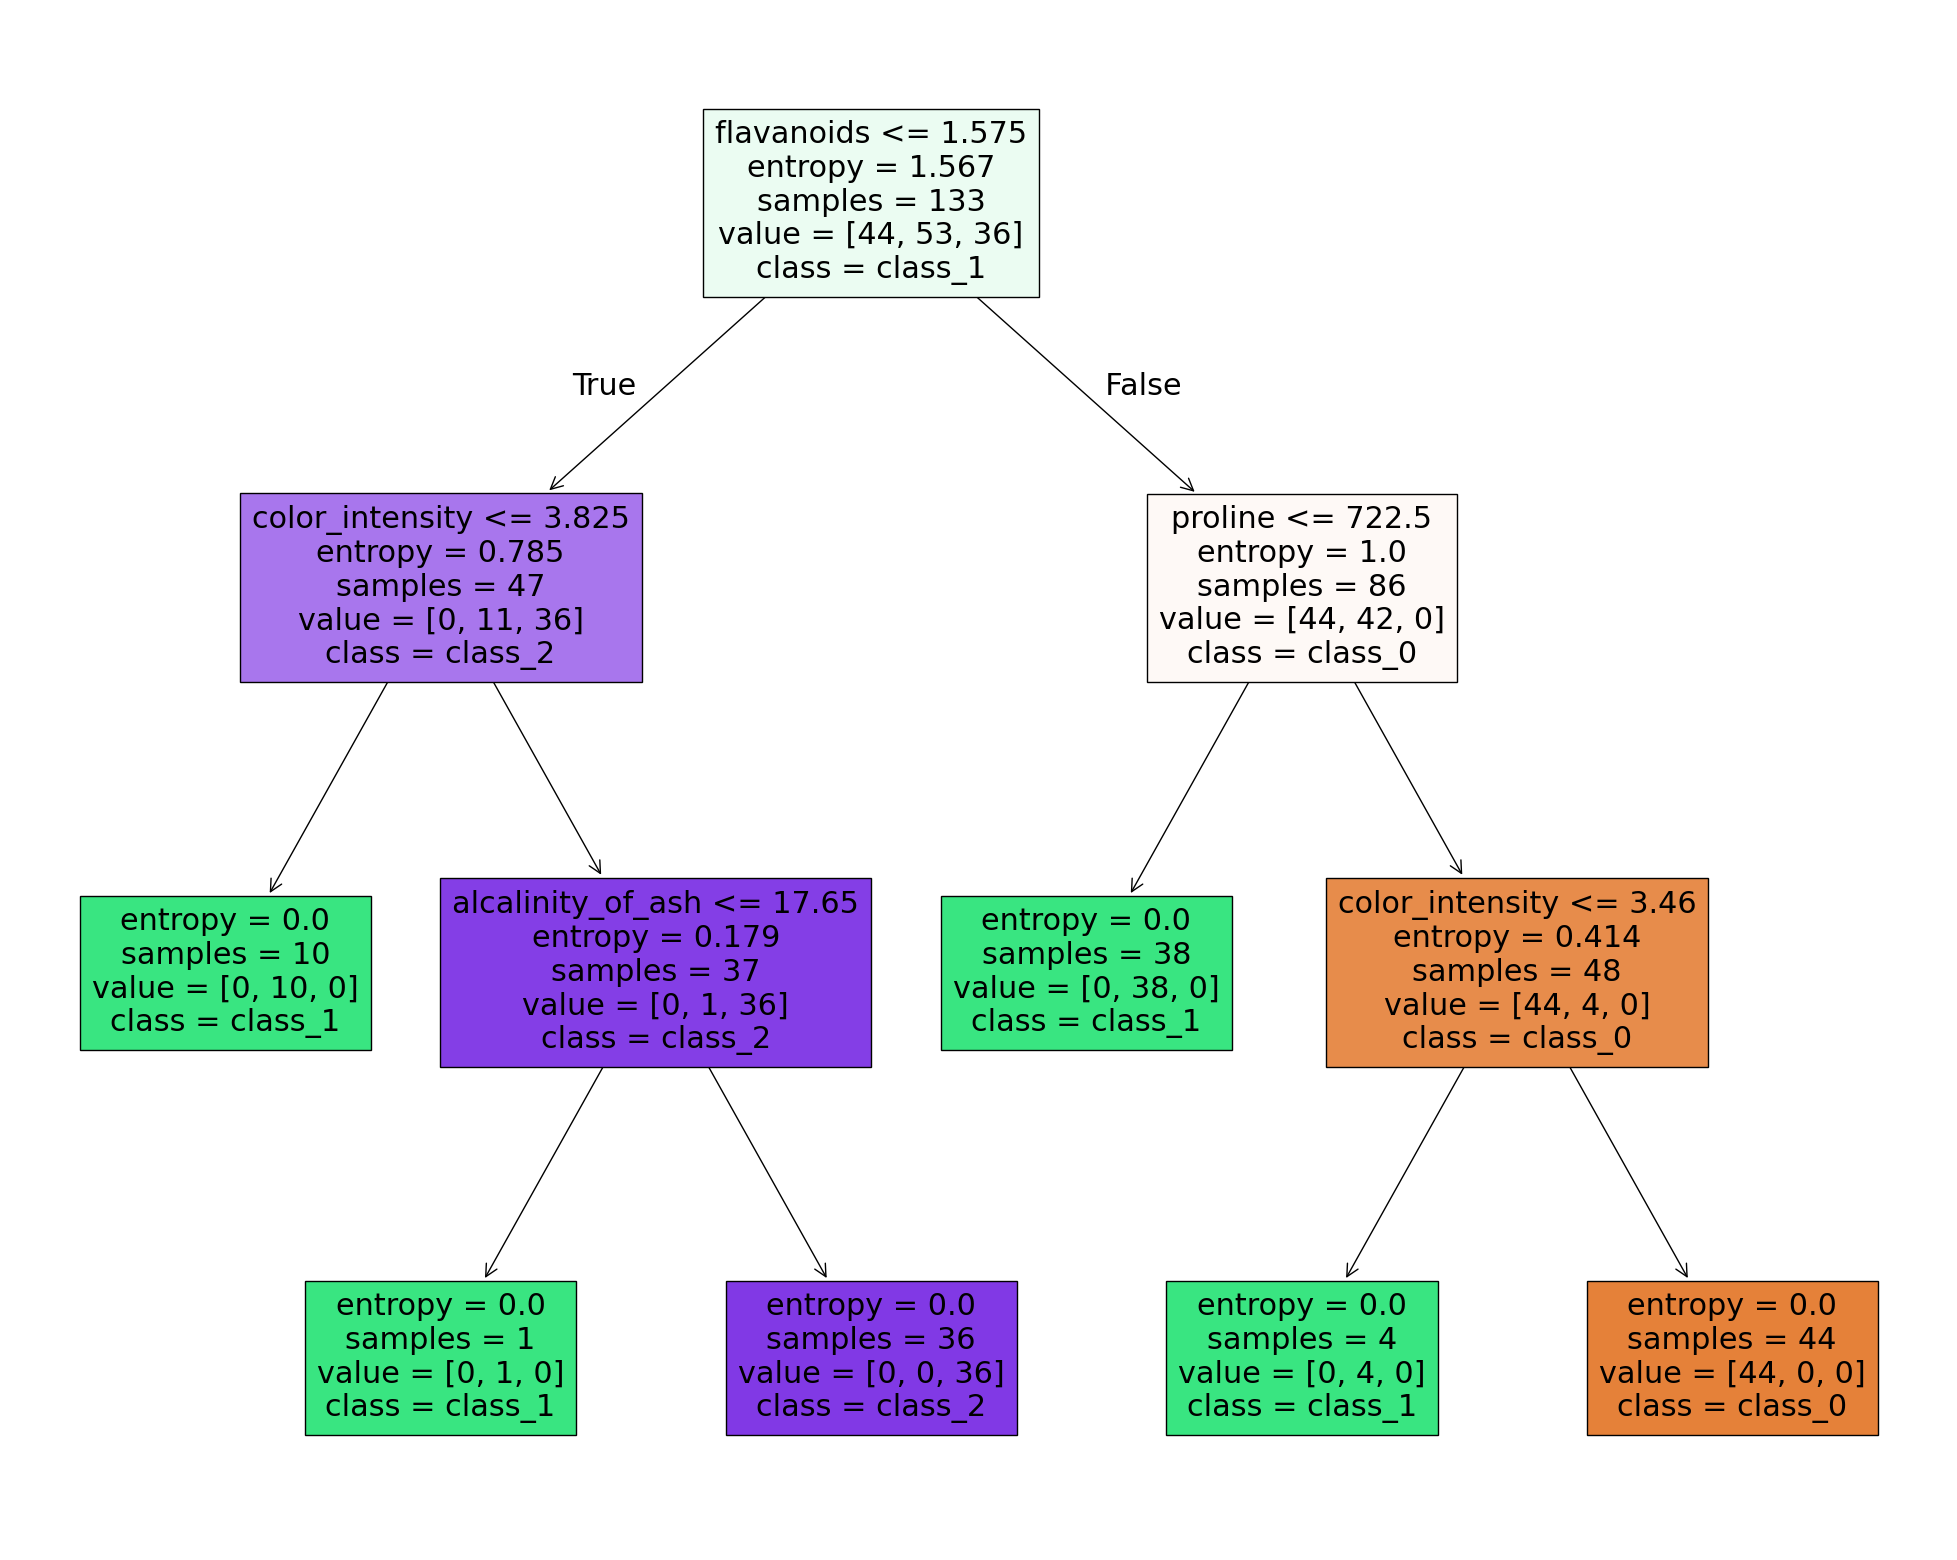

In [17]:
tree_fig_entropy = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt_entropy, 
                   feature_names=features,  
                   class_names=data.target_names,
                   filled=True)

We get a lower accuracy but simpler model using entropy. In each non terminal node there are five items of information. For example:
- the condition color_intensity <= 3.825 is checked and if the condition is true left subtree is traversed otherwise the right subtree is traversed.
- the entropy of the node is 0.785.
- from the initial 133 samples at the node, 47 samples are considered at this node.
- among the 47 samples, there are no instances of class 0, 11 instances of class 1, and 36 instances of class 2.
- the node classifies class 2 (not very important as the classification decision is made at the terminal nodes only).

#### 2.6 Tree Pruning
Sometimes growing the full tree leads to overfitting. We saw that full trees are hard to interpret. We can trim the trees to a certain level. The process of trimming trees is called Pruning. Generally, it is preferred to have simpler trees. In sklearn decision tree library, there are three parameters for pruning the trees:
- *max_leaf_nodes*: Reduce the number of leaf nodes.
- *min_samples_leaf*: Restrict the size of the sample leaf. Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total.
- *max_depth*: Reduce the depth of the tree to build a generalised tree. Set the depth of the tree to 3, 5, or 10, depending on verification of test data.

More information at: 👉 [scikit-learn: DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn)

In [18]:
# trim from existing 13 leaf nodes to 6 using max_leaf_nodes
dt_6leaf = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
dt_6leaf.fit(X_train, y_train)
acc_6leaf = accuracy_score(y_test, dt_6leaf.predict(X_test))
print(f"Accuracy with 6 leaf nodes: {acc_6leaf:.2f}")


Accuracy with 6 leaf nodes: 0.96


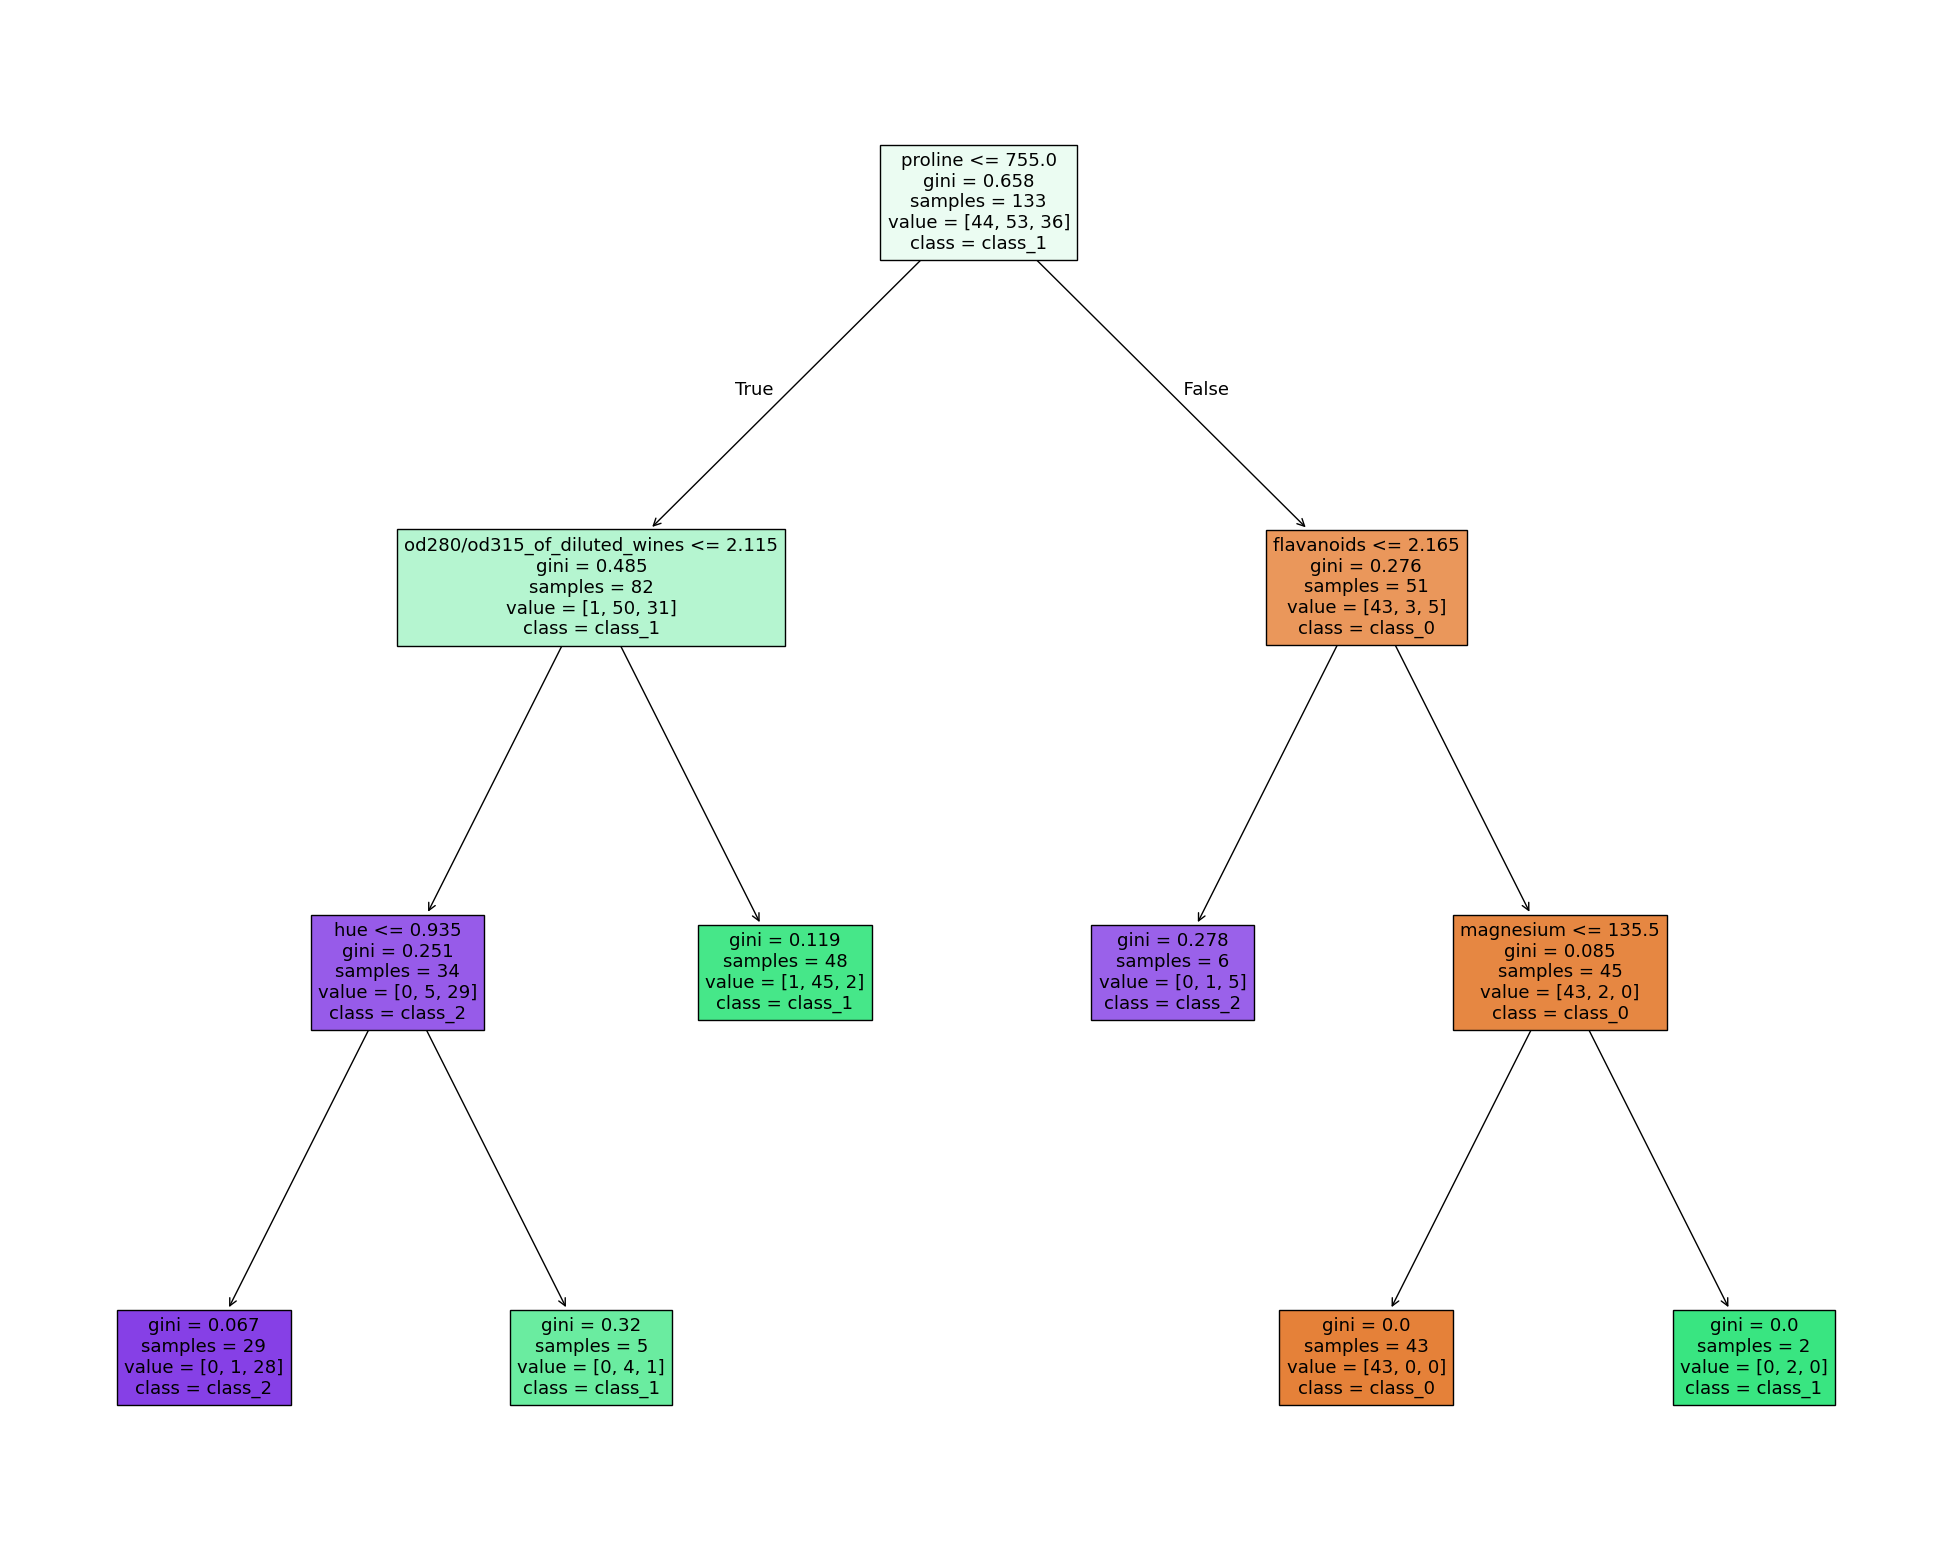

In [19]:
tree_fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt_6leaf, 
                   feature_names=features,  
                   class_names=data.target_names,
                   filled=True)

According to min_samples_leaf, a node will be further split if both the children of the node would have at least min_samples_leaf training samples.

In [20]:
# trim using min_samples_leaf
dt_10minSamples = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
dt_10minSamples.fit(X_train, y_train)
acc_10minSamples = accuracy_score(y_test, dt_10minSamples.predict(X_test))
print(f"Accuracy with min_samples_leaf=10: {acc_10minSamples:.2f}")

Accuracy with min_samples_leaf=10: 0.78


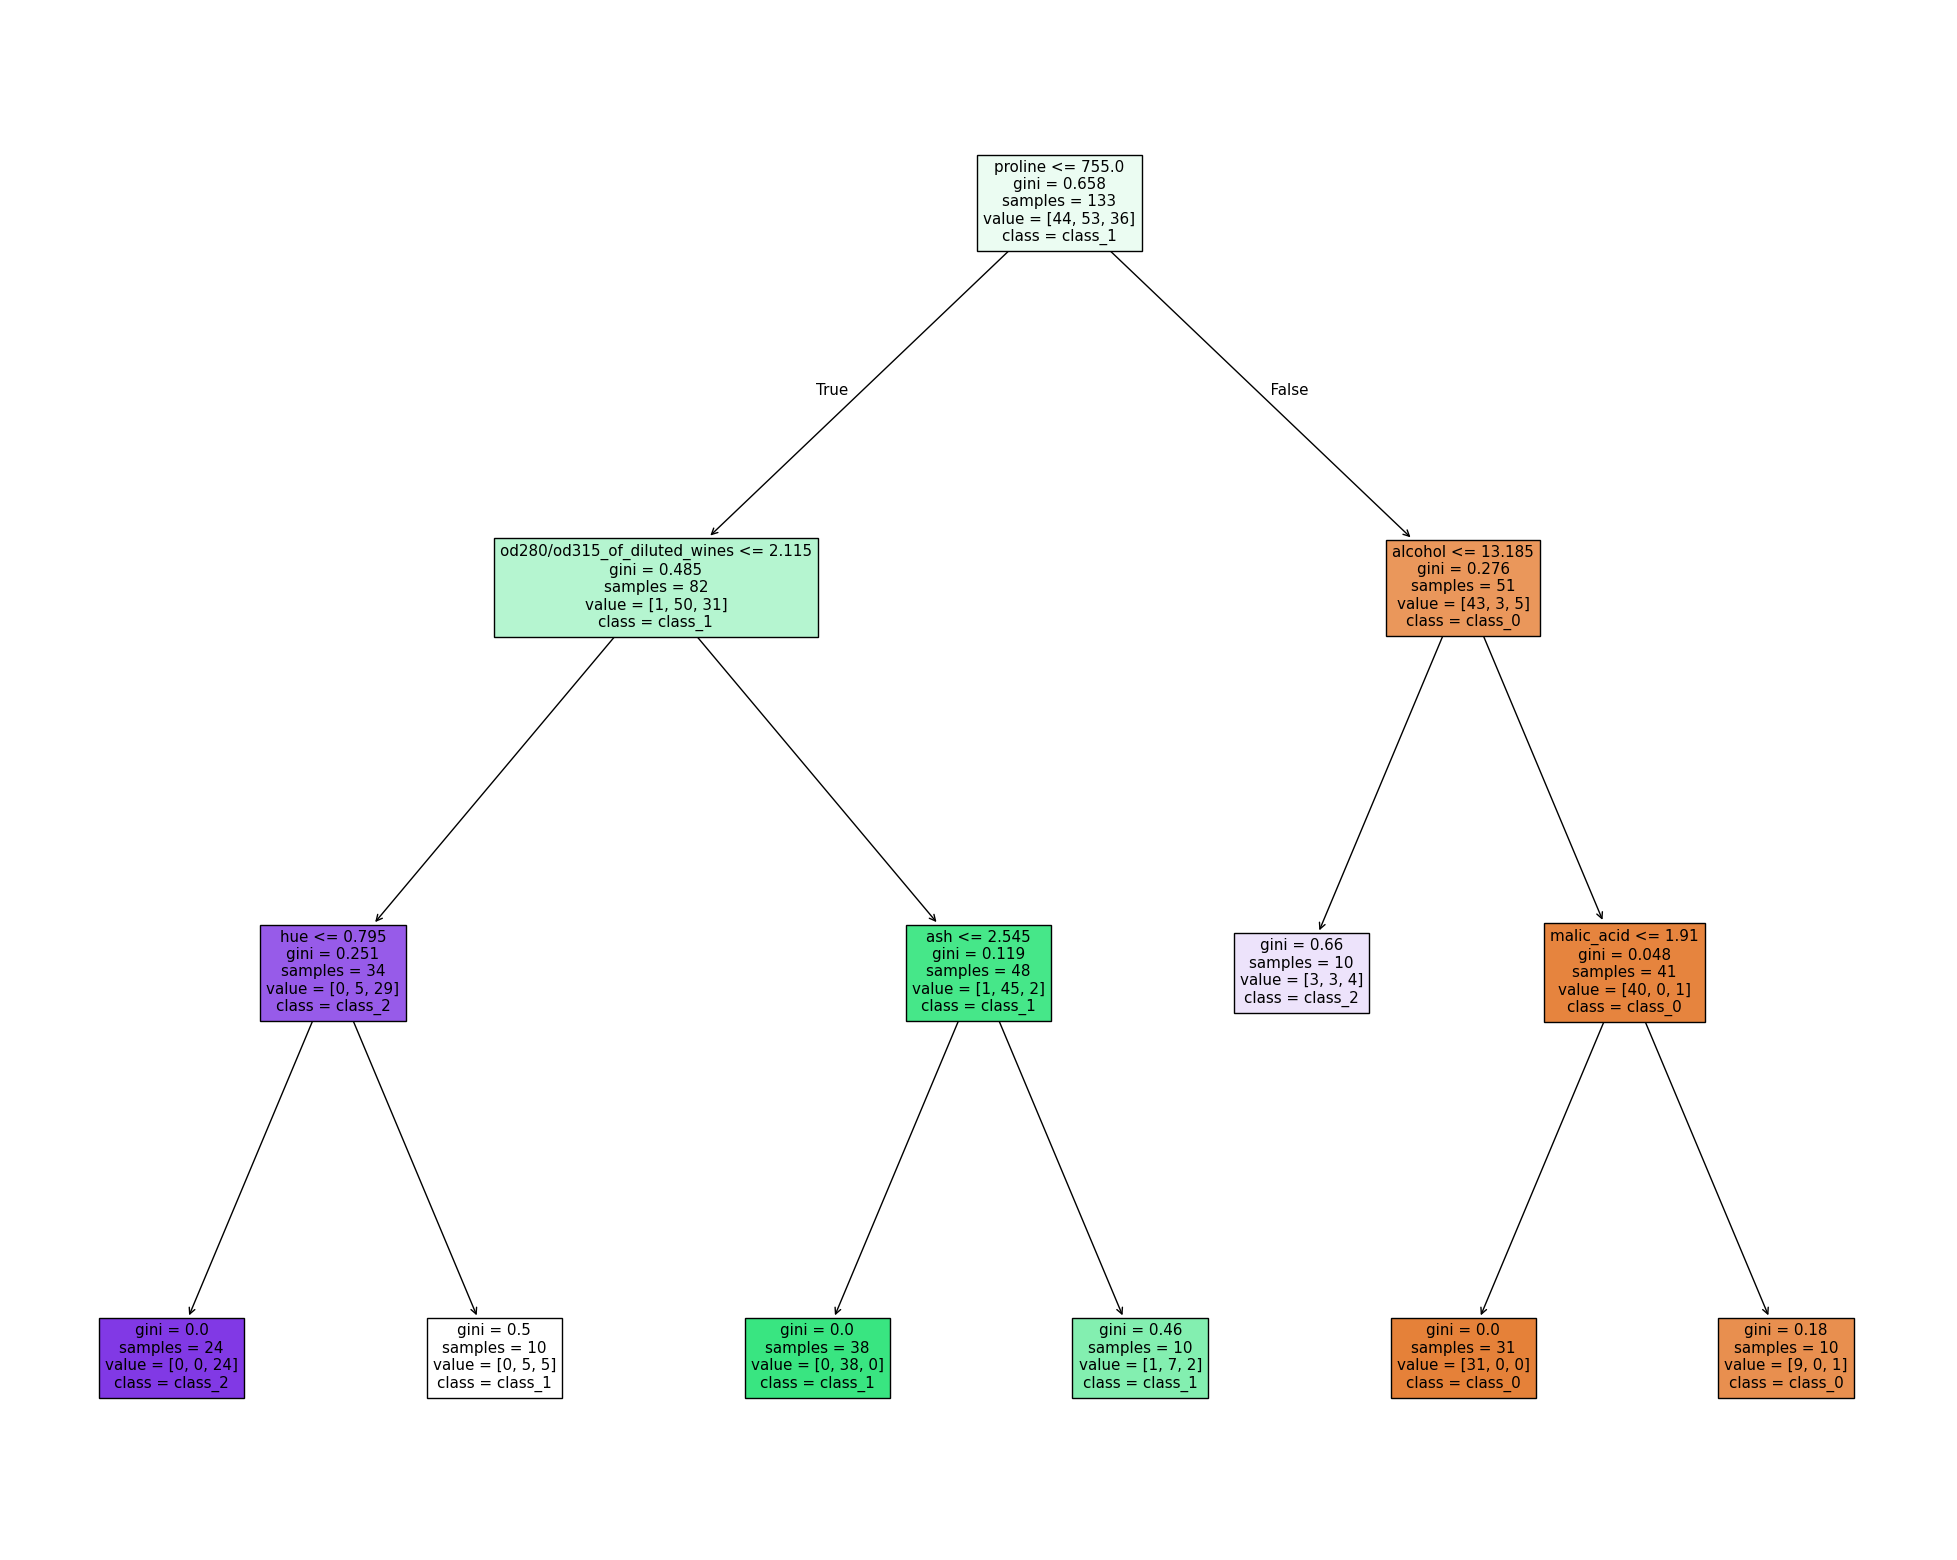

In [21]:
tree_fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt_10minSamples, 
                   feature_names=features,  
                   class_names=data.target_names,
                   filled=True)


In the above figure, consider the rightmost leaf with gini 0.18. It has 10 samples and further splitting this node will create nodes with less than 10 samples, therefore it is not divided further.

In [22]:
# Trim using max_depth. Restrict dt to depth = 2
dt_depth2 = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
dt_depth2.fit(X_train, y_train)
acc_depth2 = accuracy_score(y_test, dt_depth2.predict(X_test))
print(f"Accuracy with max_depth=2: {acc_depth2:.2f}")


Accuracy with max_depth=2: 0.93


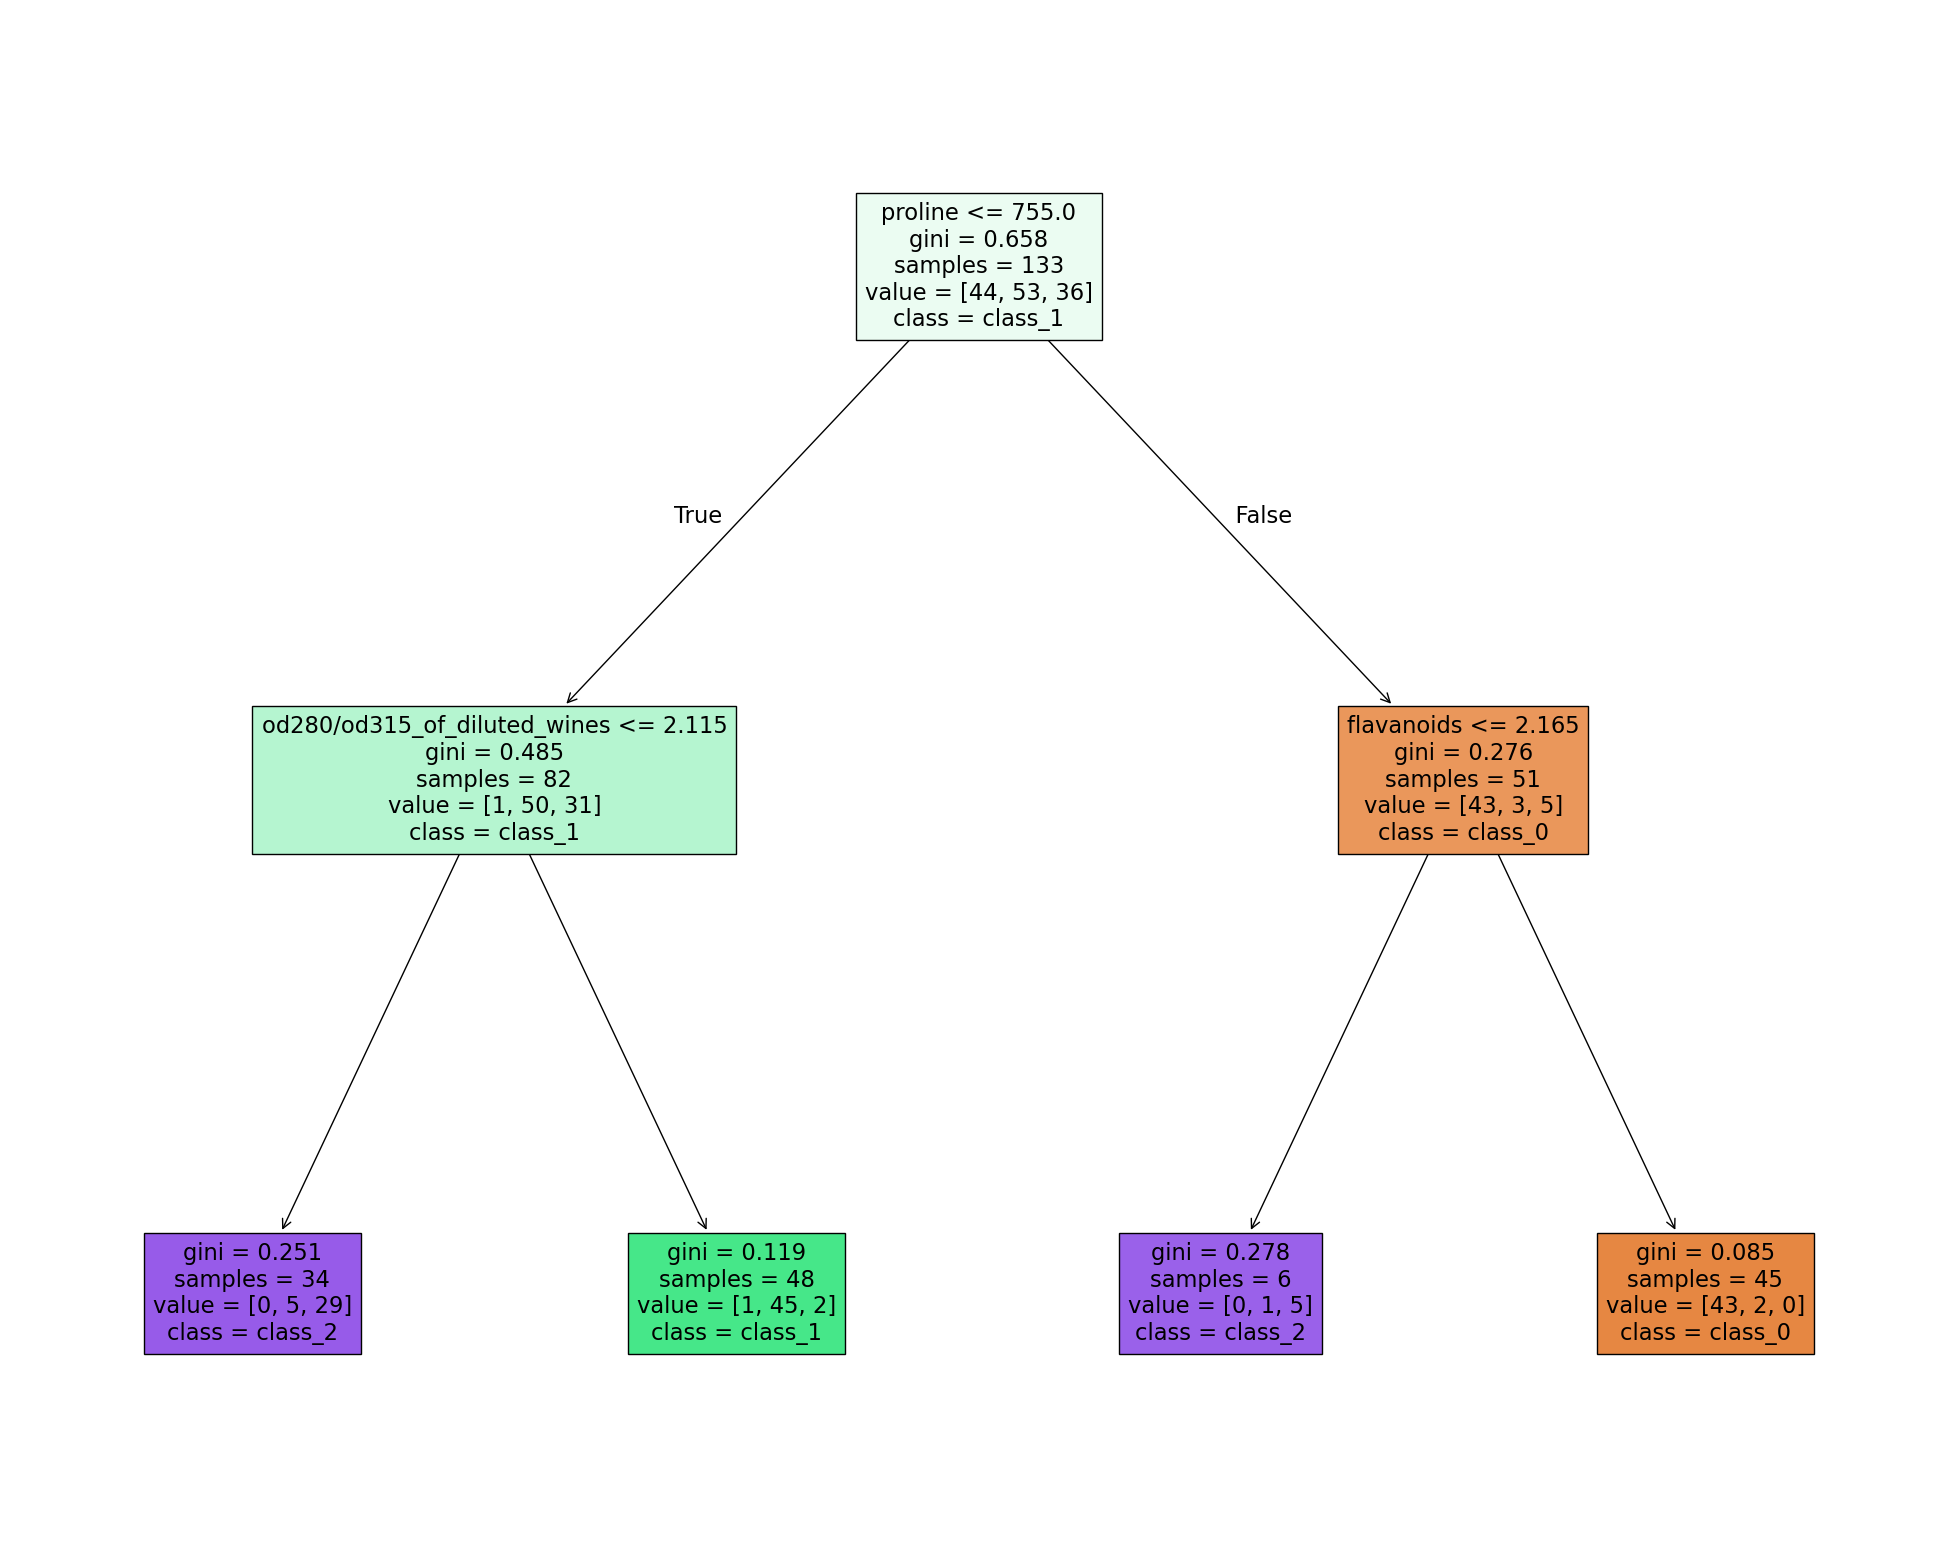

In [23]:
tree_fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt_depth2, 
                   feature_names=features,  
                   class_names=data.target_names,
                   filled=True)


In [24]:
# Use the above prunning methods in combination
dtree = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 2, random_state=0)
dtree.fit(X_train, y_train)
acc_dtree = accuracy_score(y_test, dtree.predict(X_test))
print(f"Accuracy with pruning methods: {acc_dtree:.2f}")

Accuracy with pruning methods: 0.93


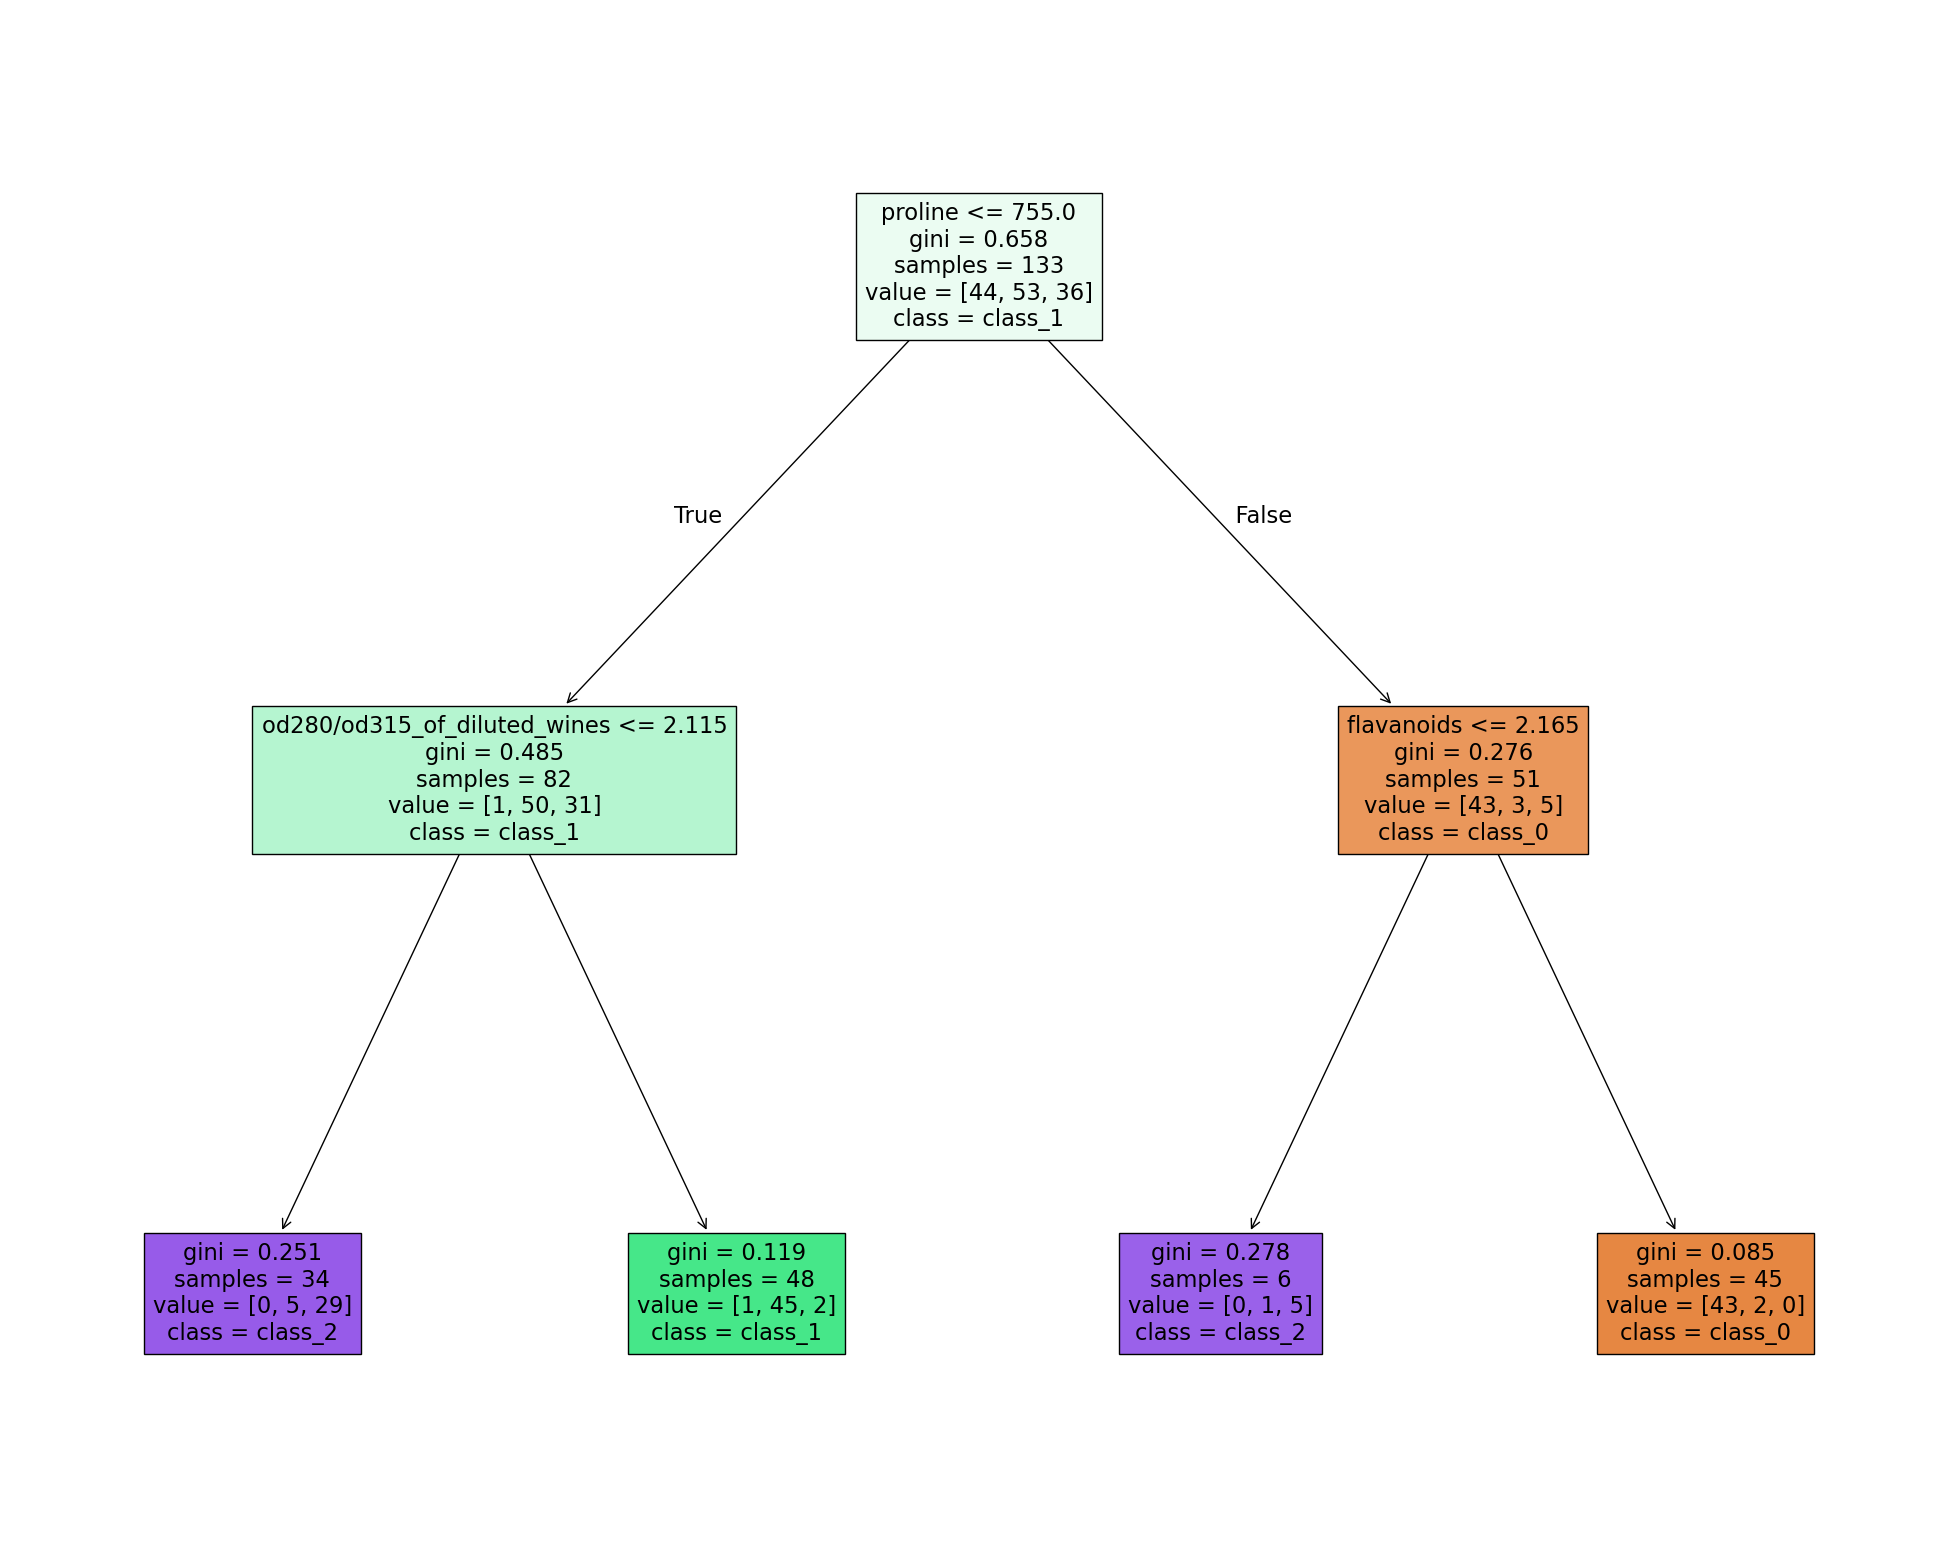

In [25]:
tree_fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtree, 
                   feature_names=features,  
                   class_names=data.target_names,
                   filled=True)
